In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys
from tqdm import tqdm
sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata

In [2]:
grid_filepath = '/media/drdarby/Elements/data/L1_llc1080/L1_N_Greenland_grid.nc'
grid = xr.open_dataset(grid_filepath)#.rename({'XC':'longitude','YC':'latitude'})


In [3]:
data_path = '/media/drdarby/Elements/data/N_Greenland/other_observables/'
files, filepath = tools.get_data_paths_from_binary(data_path,'observables',file_end='nc')


In [10]:
data = xr.open_mfdataset(filepath[0])

In [ ]:
data

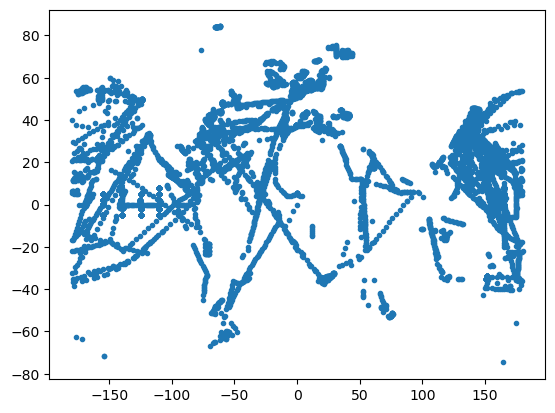

In [11]:
plt.plot(data['LONGITUDE'], data['LATITUDE'],'.')

In [14]:
#data = xr.open_mfdataset(filepath[3])

data_cut = data.where(np.logical_and(data['LATITUDE']<85,data['LATITUDE']>77)).where(np.logical_and(data['LONGITUDE']>-65,data['LONGITUDE']<-10))
data_cut = data_cut.dropna(dim='N_PROF',how='all')

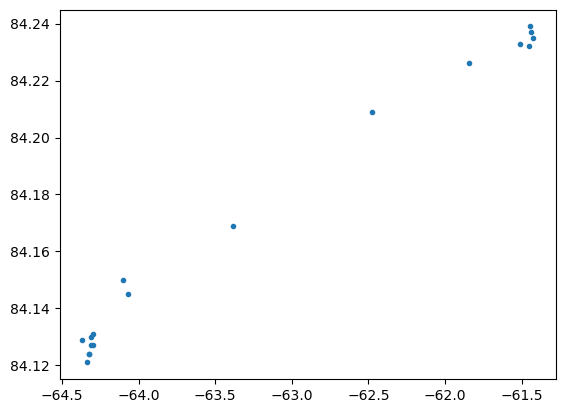

In [15]:
plt.plot(data_cut['LONGITUDE'], data_cut['LATITUDE'],'.')

In [26]:
data_cut = data_cut.set_coords({'DEPH_CORRECTED'})

In [6]:
data_cut = data_cut.dropna(dim='N_PROF',how='all')

In [54]:
str(np.array(data_cut['JULD'])[0]).split('-')

['1992', '01', '02T00:00:00.000000000']

In [47]:
#PSAL_CORRECTED
#TEMP
data_cut = data_cut.set_coords({'DEPH_CORRECTED','LATITUDE','LONGITUDE'})

data_cut['POTM_CORRECTED'].dropna(dim='N_LEVELS',how='all')#.plot(y='DEPH_CORRECTED',x='N_PROF')
#data_cut['PSAL_CORRECTED'].dropna(dim='N_LEVELS',how='all').plot(y='DEPH_CORRECTED',x='N_PROF')
#plt.gca().invert_yaxis()
temp = data_cut['POTM_CORRECTED'].mean(dim='N_PROF')
psal = data_cut['PSAL_CORRECTED'].mean(dim='N_PROF')

temp_sal = xr.merge([temp,psal])

In [55]:
time_str = str(np.array(data_cut['JULD'])[0]).split('-')
year,month, day = int(time_str[0]),int(time_str[1]),1
temp_sal.coords['time'] = datetime(year,month,day)

In [56]:
files, filepath = tools.get_data_paths_from_binary(data_path,'Profiles_workable',file_end='nc')
observed = xr.open_mfdataset(filepath_proc,combine='nested',concat_dim='N_PROF')

<xarray.Dataset>
Dimensions:         (N_PROF: 30, N_LEVELS: 400)
Coordinates:
    DEPH_CORRECTED  (N_PROF, N_LEVELS) float32 dask.array<chunksize=(30, 400), meta=np.ndarray>
    LATITUDE        (N_PROF) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    LONGITUDE       (N_PROF) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    time            datetime64[ns] 1992-01-01
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables:
    POTM_CORRECTED  (N_PROF, N_LEVELS) float32 dask.array<chunksize=(30, 400), meta=np.ndarray>
    PSAL_CORRECTED  (N_PROF, N_LEVELS) float32 dask.array<chunksize=(30, 400), meta=np.ndarray>
Attributes:
    long_name:       corrected pot. temp
    _fillvalue:      99999.0
    units:           degree_celsius
    valid_min:       -3.0
    valid_max:       40.0
    comment:         corrected value
    c_format:        %9.3f
    fortran_format:  f9.3
    resolution:      0.001

In [19]:
for i in tqdm(range(1,len(filepath))):
    data = xr.open_mfdataset(filepath[i])

    data_cut = data.where(np.logical_and(data['LATITUDE']<85,data['LATITUDE']>77)).where(np.logical_and(data['LONGITUDE']>-75,data['LONGITUDE']<-10))
    data_cut = data_cut.dropna(dim='N_PROF',how='all')
    if len(data_cut['N_PROF'])!=0:
        data_cut = data_cut.set_coords({'DEPH_CORRECTED','LATITUDE','LONGITUDE'})
        temp = data_cut['POTM_CORRECTED']
        psal = data_cut['PSAL_CORRECTED']
        temp_sal = xr.merge([temp,psal])
        time_str = str(np.array(data_cut['JULD'])[0]).split('-')
        year,month, day = int(time_str[0]),int(time_str[1]),1
        temp_sal.coords['time'] = datetime(year,month,day)
        data.close()
        data_cut.close()
        temp_sal.to_netcdf(data_path + 'Profiles_workable/salt_temp_nares_'+str(i).zfill(4)+'.nc')


100%|█████████████████████████████████████████| 359/359 [40:03<00:00,  6.70s/it]


In [4]:
files_proc, filepath_proc = tools.get_data_paths_from_binary(data_path,'Profiles_workable',file_end='nc')
observed = xr.open_mfdataset(filepath_proc,combine='nested',concat_dim='N_PROF').rename({'LATITUDE':'latitude','LONGITUDE':'longitude','DEPH_CORRECTED':'depths','POTM_CORRECTED':'Theta_obs','PSAL_CORRECTED':'Salinity_obs'})

In [5]:
depth_range = np.linspace(5,np.array(observed.depths.max()),400)

In [16]:
data_cut['LATITUDE']
data_cut['LONGITUDE']
np.array(data_cut['JULD'])



array(['1992-02-01T00:00:00.000000000', '1992-02-02T00:00:00.000000000',
       '1992-02-03T00:00:00.000000000', '1992-02-04T00:00:00.000000000',
       '1992-02-05T00:00:00.000000000', '1992-02-06T00:00:00.000000000',
       '1992-02-07T00:00:00.000000000', '1992-02-08T00:00:00.000000000',
       '1992-02-09T00:00:00.000000000', '1992-02-10T00:00:00.000000000',
       '1992-02-11T00:00:00.000000000', '1992-02-12T00:00:00.000000000',
       '1992-02-13T00:00:00.000000000', '1992-02-14T00:00:00.000000000',
       '1992-02-15T00:00:00.000000000', '1992-02-16T00:00:00.000000000',
       '1992-02-17T00:00:00.000000000', '1992-02-18T00:00:00.000000000',
       '1992-02-19T00:00:00.000000000', '1992-02-20T00:00:00.000000000',
       '1992-02-21T00:00:00.000000000', '1992-02-22T00:00:00.000000000',
       '1992-02-23T00:00:00.000000000', '1992-02-24T00:00:00.000000000',
       '1992-02-25T00:00:00.000000000', '1992-02-26T00:00:00.000000000',
       '1992-02-27T00:00:00.000000000', '1992-02-28

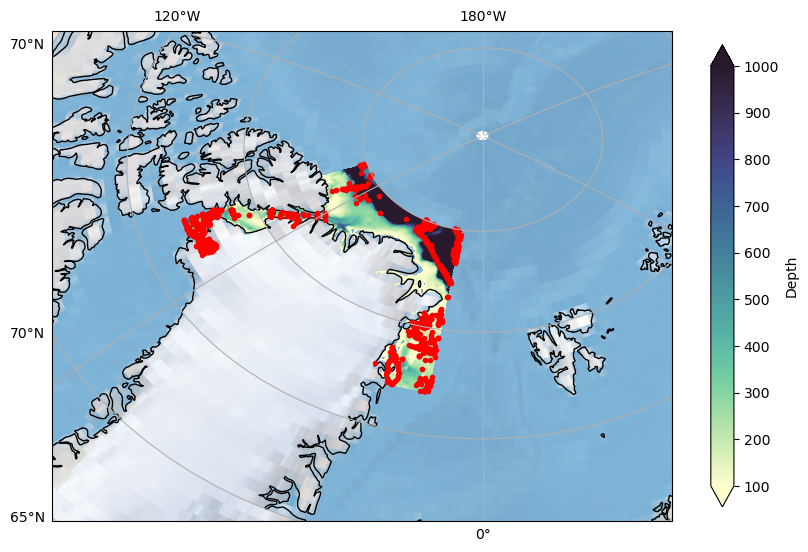

In [24]:
plt.figure(figsize=(10,10))
grid = grid.set_coords({'XC','YC'})
proj = ccrs.Orthographic(central_latitude=50)

ax = plt.axes(projection=proj)

grid.Depth.where(grid.Depth>0).where(np.logical_and(grid.YC<85,grid.YC>77)).where(np.logical_and(grid.XC>-75,grid.XC<-10)).plot(x='XC',y='YC',transform=ccrs.PlateCarree(),ax=ax,cmap=cm.cm.deep,vmin=100,vmax=1000,cbar_kwargs={'shrink':0.6}) #.isel(i=slice(0,150),j=slice(145,270))
# plt.plot(grid.Depth.XC[:,0],grid.Depth.YC[:,0],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[:,-1],grid.Depth.YC[:,-1],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[0,:],grid.Depth.YC[0,:],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[-1,:],grid.Depth.YC[-1,:],'r.',transform=ccrs.PlateCarree())
plt.plot(observed['LONGITUDE'], observed['LATITUDE'],'r.',transform=ccrs.PlateCarree())
#plt.plot(grid.Depth.XC[0,:],grid.Depth.YC[:,0],'r.',transform=ccrs.PlateCarree())
#plt.plot(grid.Depth.XC[:,0],grid.Depth.YC[0,:],'r.',transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels=False

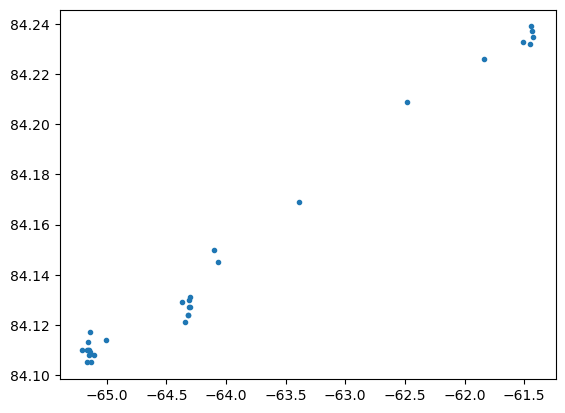

In [17]:
plt.plot(data_cut['LONGITUDE'], data_cut['LATITUDE'],'.')

In [8]:
llc1080_path = '/media/drdarby/Elements/data/N_Greenland/solution_output/'
llc1080_files, llc1080_filepath = tools.get_data_paths_from_binary(llc1080_path,'llc_1080',file_end='nc')
data_1080 = xr.open_mfdataset(llc1080_filepath).set_coords({'longitude','latitude'})

In [9]:
#convert data to usable time
sec_itr_1080 = 300
def date_to_iter_number(date,seconds_per_iter = 60):

    total_seconds = (date-datetime(1992,1,1)).total_seconds()
    iter_number = total_seconds/seconds_per_iter
    # print(iter_number)
    return(iter_number)

def iter_number_to_date(iter_number,seconds_per_iter=60):

    total_seconds = iter_number*seconds_per_iter
    date = datetime(1992,1,1) + dt.timedelta(seconds=total_seconds)
    # print(date)
    return(date)
time_snap = []
for i in range(0,len(data_1080.iterations)):
    t_date = iter_number_to_date(np.array(data_1080.iterations)[i],seconds_per_iter=sec_itr_1080)
    time_snap.append(t_date)

In [10]:
data_1080 = data_1080.drop_vars('time')
data_1080 = data_1080.rename({'iterations':'time'})
data_1080.coords['time'] = np.array(time_snap)
data_1080 = data_1080.rename({'rows':'Y','cols':'X'})

In [11]:
time_shared= np.intersect1d(data_1080.time,np.unique(observed.time))


In [12]:
obs_lat, obs_lon = observed['latitude'],observed['longitude']

In [13]:
model_time = data_1080.sel(time=time_shared)


In [48]:
model_time

<xarray.DataArray 'latitude' (time: 82, Y: 720, X: 720)>
dask.array<getitem, shape=(82, 720, 720), dtype=float32, chunksize=(1, 720, 720), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1992-02-01 1992-03-01 ... 2021-12-01
    longitude  (time, Y, X) float32 dask.array<chunksize=(1, 720, 720), meta=np.ndarray>
    latitude   (time, Y, X) float32 dask.array<chunksize=(1, 720, 720), meta=np.ndarray>
Dimensions without coordinates: Y, X

In [49]:
k=0
absi = np.abs(model_time.isel(time=0).latitude-obs_lat[k])
absj = np.abs(model_time.isel(time=0).longitude-obs_lon[k])
c = np.maximum(absi, absj)
ind = np.unravel_index(np.argmin(np.array(c), axis=None),c.shape)
ind

(360, 478)

In [152]:
observed.N_PROF.where(observed.time==model_time.time[3]).dropna(dim='N_PROF')

<xarray.DataArray 'N_PROF' (N_PROF: 28)>
array([ 94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121.])
Coordinates:
    LATITUDE   (N_PROF) float64 dask.array<chunksize=(28,), meta=np.ndarray>
    LONGITUDE  (N_PROF) float64 dask.array<chunksize=(28,), meta=np.ndarray>
    time       (N_PROF) datetime64[ns] 1992-08-01 1992-08-01 ... 1992-08-01
Dimensions without coordinates: N_PROF

In [20]:
model_time['Theta'].sel(X=ind[1],Y=ind[0]).isel(time=i).interp(depths=depth_range).plot(y='depths')
observed.isel(N_PROF=k).interp(depths=depth_range)['Theta_obs'].plot(y='depths')



NameError: name 'ind' is not defined

In [28]:
observed = observed.where(observed.latitude>78).dropna(dim='N_PROF',how='all')

In [41]:
np.array([np.array(model_time.time[i])])

array(['1992-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [51]:
Theta_model_profiles = []
#observed = observed.rename({'LATITUDE':'latitude','LONGITUDE':'longitude'})#'DEPH_CORRECTED':'depths'})#,'POTM_CORRECTED':'Theta_obs'})
for i in tqdm(range(0,len(model_time.time))):#len(model_time.time))):
    N_PROF_time = np.array(observed.N_PROF.where(observed.time==model_time.time[i]).dropna(dim='N_PROF')).astype(int)
    ind_points = []
    for k in N_PROF_time:
        absi = np.abs(model_time.isel(time=0).latitude-obs_lat[k])
        absj = np.abs(model_time.isel(time=0).longitude-obs_lon[k])
        c = np.maximum(absi, absj)
        ind = np.unravel_index(np.argmin(np.array(c), axis=None),c.shape)
        ind_points.append(ind)
        
        theta_profile = model_time['Theta'].sel(X=ind[1],Y=ind[0]).isel(time=i).interp(depths=depth_range)
        theta_profile.coords['profile_number']=k
        theta_profile['latitude'] = np.array(observed.latitude[k])
        theta_profile['longitude'] = np.array(observed.longitude[k])

        depth_obs = np.array(observed['Theta_obs'].sel(N_PROF=k).depths)
        theta_profile_obs = np.array(observed['Theta_obs'].sel(N_PROF=k))
        theta_profile_obs = theta_profile_obs[np.isfinite(depth_obs)]
        depth_obs = depth_obs[np.isfinite(depth_obs)]
        if (np.diff(depth_obs)==0).sum()>0:
            repeat_depths_ind = np.argwhere(np.array(np.diff(depth_obs)==0) == np.amax(np.array(np.diff(depth_obs)==0)))
            theta_profile_obs = np.delete(theta_profile_obs,repeat_depths_ind.ravel()+1)
            depth_obs = np.delete(depth_obs,repeat_depths_ind.ravel()+1)

        theta_profile_obs = np.reshape(theta_profile_obs,(1,1,len(depth_obs)))
        theta_profile_obs = xr.DataArray(theta_profile_obs,dims=['time','profile_number','depths'],coords=[np.array([np.array(model_time.time[i])]),[k],depth_obs],name='Theta_obs')
        theta_profile_obs = theta_profile_obs.interp(depths=depth_range)
        
        theta_profile_tot = xr.merge([theta_profile,theta_profile_obs])
        theta_profile_tot.to_netcdf(data_path+ 'llc_1080_profile_subsampled/theta_model_obs_'+str(k).zfill(4)+'.nc')
        #theta_profile.close()#Theta_model_profiles.append(theta_profile)
        #salt_profile = model_time['Salt'].sel(X=ind[1],Y=ind[0]).isel(time=k).interp(depths=observed['PSAL_CORRECTED'].isel(N_PROF=0).DEPH_CORRECTED)
    
        #Salt_model_prof.append(salt_profile)

100%|███████████████████████████████████████████| 82/82 [53:33<00:00, 39.19s/it]


In [41]:
#depth_range

depth_obs = np.array(observed['Theta_obs'].sel(N_PROF=k).depths)
theta_profile_obs = np.array(observed['Theta_obs'].sel(N_PROF=k))
theta_profile_obs = theta_profile_obs[np.isfinite(depth_obs)]
depth_obs = depth_obs[np.isfinite(depth_obs)]
if (np.diff(depth_obs)==0).sum()>0:
    repeat_depths_ind = np.argwhere(np.array(np.diff(depth_obs)==0) == np.amax(np.array(np.diff(depth_obs)==0)))
    theta_profile_obs = np.delete(theta_profile_obs,repeat_depths_ind.ravel()+1)
    depth_obs = np.delete(depth_obs,repeat_depths_ind.ravel()+1)

theta_profile_obs = np.reshape(theta_profile_obs,(1,1,len(depth_obs)))
theta_profile_obs = xr.DataArray(theta_profile_obs,dims=['time','profile_number','depths'],coords=[np.array([np.array(model_time.time[i])]),[k],depth_obs],name='Theta_obs')
theta_profile_obs = theta_profile_obs.interp(depths=depth_range)

(theta_profile_obs.depths.diff(dim='depths')==0).sum()>0#interp(depths=depth_range)
#np.argwhere(np.array(theta_profile_obs.depths.diff(dim='depths')==0) == np.amax(np.array(theta_profile_obs.depths.diff(dim='depths')==0)))[0]
#np.delete()
#len(theta_profile_obs.depths)

<xarray.DataArray 'depths' ()>
array(False)

In [49]:
depth_obs = np.array(observed['Theta_obs'].sel(N_PROF=k).depths)
depth_obs = depth_obs[np.isfinite(depth_obs)]

np.argwhere(np.array(np.diff(depth_obs)==0) == np.amax(np.array(np.diff(depth_obs)==0)))

#np.amax(np.array(np.diff(depth_obs)==0))

array([[369]])

In [50]:
repeat_depths_ind.ravel()+1

array([370])

In [86]:
depth_obs = np.array(observed['Theta_obs'].sel(N_PROF=k).depths)
theta_profile_obs = theta_profile_obs.interp(depths=depth_range)



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

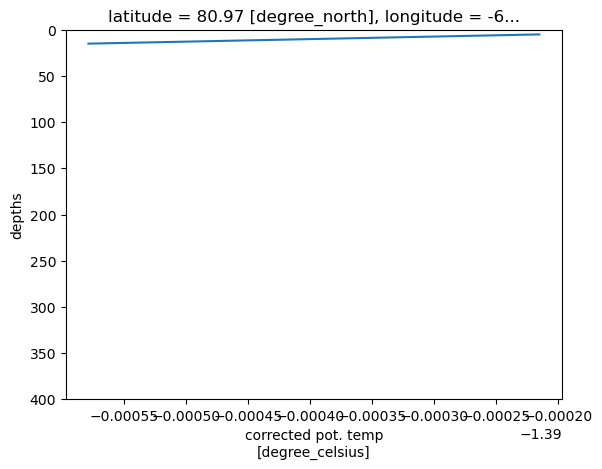

In [97]:
observed['Theta_obs'].sel(N_PROF=k).coords['N_LEVELS'] = observed['Theta_obs'].sel(N_PROF=k).depths
observed['Theta_obs'].rename({'depths':'depths_total','N_LEVELS':'depths'}).sel(N_PROF=k).interp(depths=data_1080.depths).plot(y='depths')
plt.ylim(0,400)
plt.gca().invert_yaxis()

#observed['Theta_obs'].sel(N_PROF=k).plot()#.interp(depths=data_1080.depths)

In [52]:
subsamp_files, subsamp_filepath = tools.get_data_paths_from_binary(data_path,'llc_1080_profile_subsampled',file_end='nc')
Obs_model = xr.open_mfdataset(subsamp_filepath)

In [83]:
str(np.array(Obs_model.time)[0])[5:7]

'02'

In [85]:
diff_model = Obs_model['Theta']-Obs_model['Theta_obs']
for i in tqdm(range(0,len(Obs_model.time))):
    diff_model.isel(time=i).dropna(dim='profile_number',how='all').plot(y='depths',x='profile_number',vmin=-1,vmax=1)#.isel(time=0).dropna(dim='profile_number',how='all').plot()
    plt.gca().invert_yaxis()
    plt.savefig('./graphs/Profile_comparison/diff_'+str(np.array(Obs_model.time)[0])[:4]+'_'+str(np.array(Obs_model.time)[0])[5:7]+'.png')
    plt.close()

  0%|                                                    | 0/82 [03:58<?, ?it/s]


KeyboardInterrupt: 

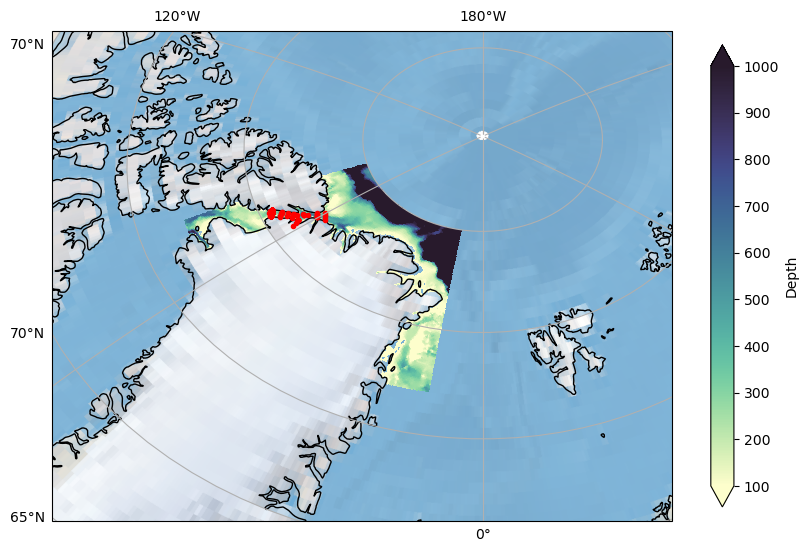

In [90]:
Obs_model_Nares = Obs_model.where(np.logical_and(Obs_model['longitude']<-50,Obs_model['longitude']>-70)).where(np.logical_and(Obs_model['latitude']<83,Obs_model['latitude']>80)).dropna(dim='profile_number',how=')

plt.figure(figsize=(10,10))
grid = grid.set_coords({'XC','YC'})
proj = ccrs.Orthographic(central_latitude=50)

ax = plt.axes(projection=proj)

grid.Depth.where(grid.Depth>0).where(np.logical_and(grid.YC<85,grid.YC>77)).where(np.logical_and(grid.XC>-75,grid.XC<-10)).plot(x='XC',y='YC',transform=ccrs.PlateCarree(),ax=ax,cmap=cm.cm.deep,vmin=100,vmax=1000,cbar_kwargs={'shrink':0.6}) #.isel(i=slice(0,150),j=slice(145,270))
# plt.plot(grid.Depth.XC[:,0],grid.Depth.YC[:,0],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[:,-1],grid.Depth.YC[:,-1],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[0,:],grid.Depth.YC[0,:],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[-1,:],grid.Depth.YC[-1,:],'r.',transform=ccrs.PlateCarree())
plt.plot(Obs_model_Nares['longitude'],Obs_model_Nares['latitude'],'.',transform=ccrs.PlateCarree())

#plt.plot(grid.Depth.XC[0,:],grid.Depth.YC[:,0],'r.',transform=ccrs.PlateCarree())
#plt.plot(grid.Depth.XC[:,0],grid.Depth.YC[0,:],'r.',transform=ccrs.PlateCarree())

ax.coastlines()
ax.stock_img()
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels=False

In [105]:
Obs_model_Nares_cut = Obs_model_Nares['Theta_obs'].dropna(dim='time',how='all').dropna(dim='depths',how='all').dropna(dim='profile_number',how='all')
Obs_model_Nares_cut_obs = Obs_model_Nares['Theta'].dropna(dim='time',how='all').dropna(dim='depths',how='all').dropna(dim='profile_number',how='all')


In [ ]:
Obs_model_Nares_cut.isel(time=0).dropna(dim='depths',how='all').dropna(dim='profile_number',how='all').plot(y='depths')

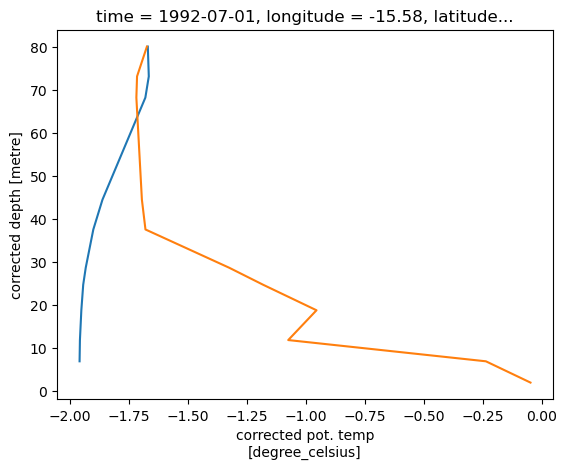

In [62]:
#observed['Theta_obs'].sel(N_PROF=k)
theta_profile['Theta'].plot(y='depths')
theta_profile['Theta_obs'].plot(y='depths')

In [65]:
theta_profile

<xarray.Dataset>
Dimensions:    (N_LEVELS: 400)
Coordinates:
    time       datetime64[ns] 2019-08-01
    longitude  float64 dask.array<chunksize=(), meta=np.ndarray>
    latitude   float64 dask.array<chunksize=(), meta=np.ndarray>
    depths     (N_LEVELS) float32 dask.array<chunksize=(400,), meta=np.ndarray>
    N_PROF     int64 7946
Dimensions without coordinates: N_LEVELS
Data variables:
    Theta      (N_LEVELS) float32 dask.array<chunksize=(400,), meta=np.ndarray>
    Theta_obs  (N_LEVELS) float32 dask.array<chunksize=(400,), meta=np.ndarray>

In [249]:
k

9128

In [246]:
len(observed.N_PROF)

9129

In [268]:
obs_test = observed.sel(N_PROF=slice(4000-74,9128))#.dropna(dim='N_LEVELS',how='all')
obs_test_N_PROF = np.array(obs_test.N_PROF)

In [269]:
obs_test['temp_1080'] = (['N_PROF','N_LEVELS'],Theta_model_profiles)

In [270]:
obs_test = obs_test.dropna(dim='N_LEVELS',how='all')

In [271]:
obs_test = obs_test.set_coords({'DEPH_CORRECTED'})

In [274]:
obs_test = obs_test.where(obs_test['DEPH_CORRECTED']>5).dropna(dim='N_LEVELS',how='all').dropna(dim='N_PROF',how='all')
obs_test['N_PROF'] = obs_test_N_PROF

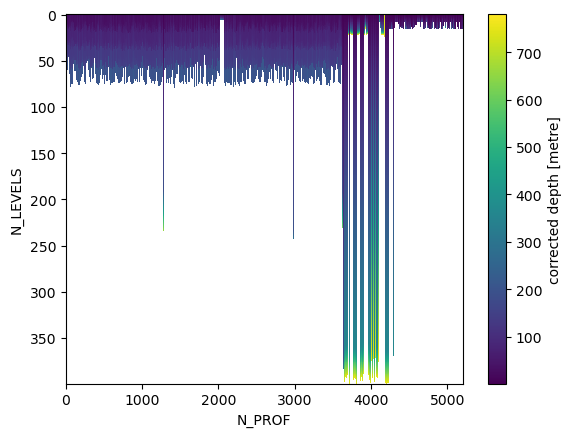

In [275]:
#obs_test['temp_1080'].plot(y='N_LEVELS')
obs_test['DEPH_CORRECTED'].plot(y='N_LEVELS')
plt.gca().invert_yaxis()

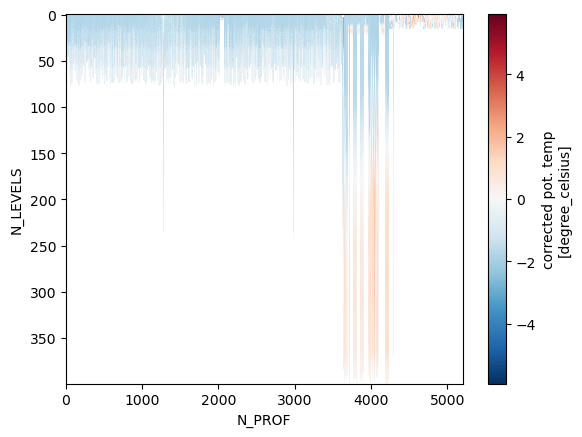

In [284]:
#obs_test['temp_1080'].plot(y='N_LEVELS')
obs_test['POTM_CORRECTED'].plot(y='N_LEVELS')
plt.gca().invert_yaxis()

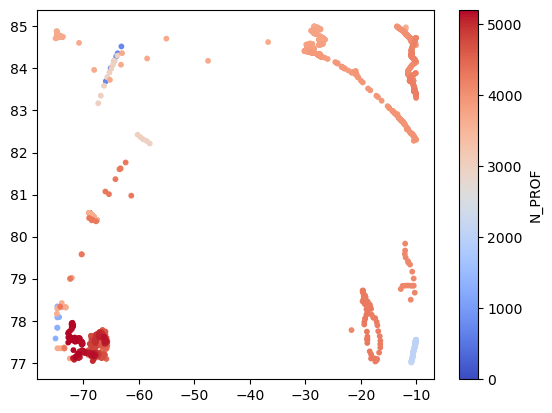

In [277]:
profile = np.meshgrid(np.array(obs_test.N_PROF),np.array(obs_test.N_PROF))

plt.scatter(obs_test['LONGITUDE'],obs_test['LATITUDE'],s=10,c = np.array(obs_test.N_PROF),cmap='coolwarm')
plt.colorbar(label='N_PROF')

In [87]:
np.shape(observed['POTM_CORRECTED'].sel(N_PROF=N_PROF_time).DEPH_CORRECTED)

(29, 400)

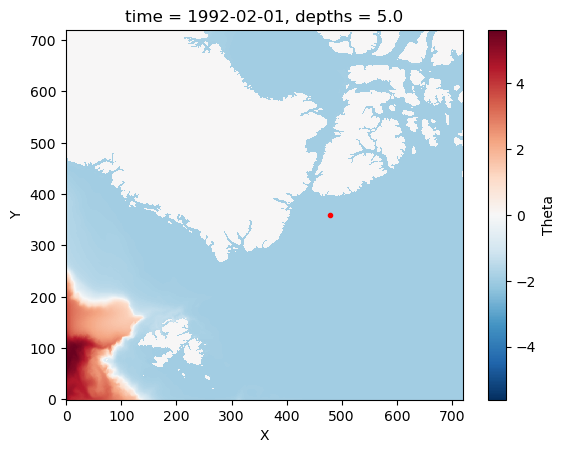

In [73]:
model_time['Theta'].isel(time=0,depths=0).plot()
plt.plot(ind[1],ind[0],'r.')


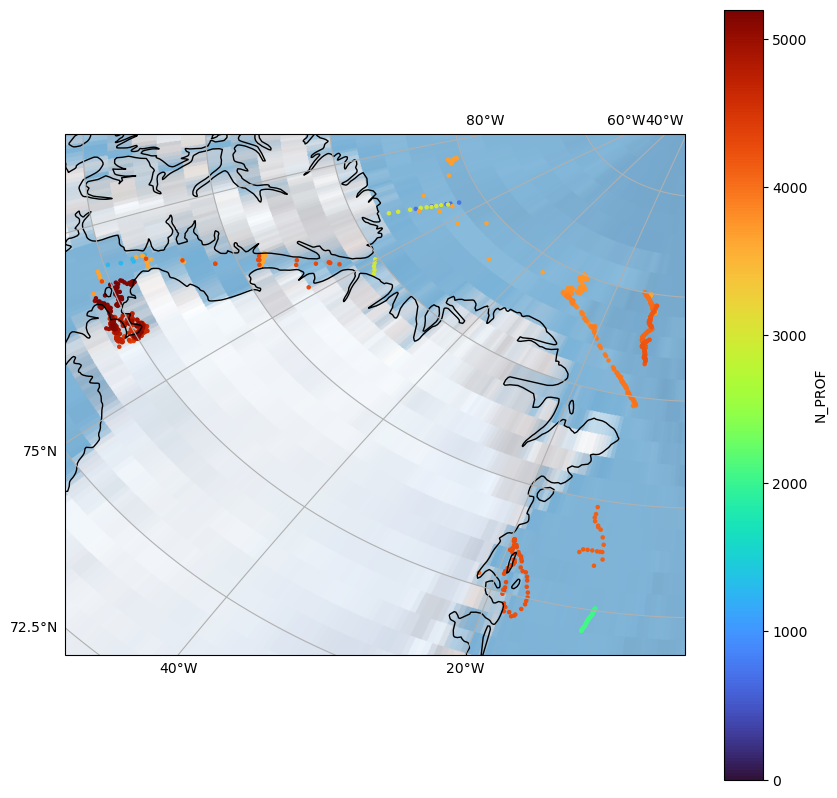

In [278]:
plt.figure(figsize=(10,10))
grid = grid.set_coords({'XC','YC'})
proj = ccrs.Orthographic(central_latitude=50)

ax = plt.axes(projection=proj)

#grid.Depth.where(grid.Depth>0).where(np.logical_and(grid.YC<85,grid.YC>77)).where(np.logical_and(grid.XC>-75,grid.XC<-10)).plot(x='XC',y='YC',transform=ccrs.PlateCarree(),ax=ax,cmap=cm.cm.deep,vmin=100,vmax=1000,cbar_kwargs={'shrink':0.6}) #.isel(i=slice(0,150),j=slice(145,270))
# plt.plot(grid.Depth.XC[:,0],grid.Depth.YC[:,0],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[:,-1],grid.Depth.YC[:,-1],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[0,:],grid.Depth.YC[0,:],'r.',transform=ccrs.PlateCarree())
# plt.plot(grid.Depth.XC[-1,:],grid.Depth.YC[-1,:],'r.',transform=ccrs.PlateCarree())
#plt.plot(observed['LONGITUDE'], observed['LATITUDE'],'r.',transform=ccrs.PlateCarree())
#plt.plot(grid.Depth.XC[0,:],grid.Depth.YC[:,0],'r.',transform=ccrs.PlateCarree())
#plt.plot(grid.Depth.XC[:,0],grid.Depth.YC[0,:],'r.',transform=ccrs.PlateCarree())


plt.scatter(obs_test['LONGITUDE'],obs_test['LATITUDE'],s=5,c = np.array(obs_test.N_PROF),transform=ccrs.PlateCarree(),cmap='turbo')
plt.colorbar(label='N_PROF')
ax.coastlines()
ax.stock_img()
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels=False

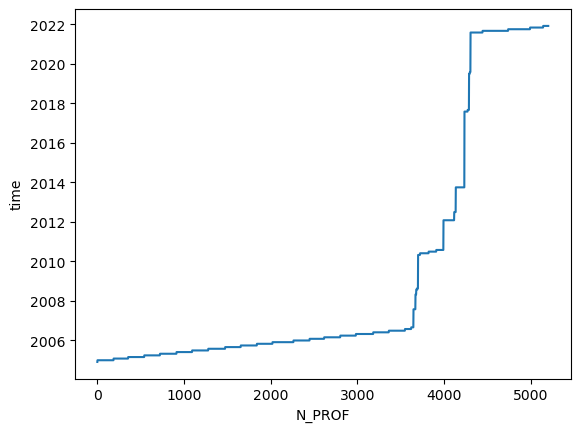

In [280]:
obs_test.time.plot()